In [8]:
import pandas as pd
import mysql.connector
import os


csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments'),
    ('order_items.csv','order_items') 
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Sahil@321',
    database='ecommerce'
)
cursor = conn.cursor()


folder_path = 'C:/Users/sahil/OneDrive/Desktop/Commerce'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    

    df = pd.read_csv(file_path)
    
    
    df = df.where(pd.notnull(df), None)
    
    
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

   
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

  
    for _, row in df.iterrows():
       
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    
    conn.commit()


conn.close()

Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Processing products.csv
NaN values before replacement:
product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
prod

In [ ]:
!pip install mysql-connector-python


In [ ]:
import mysql.connector

try:
    conn = mysql.connector.connect(
        host='localhost',
        user='root',
        password='Sahil@321',  
        database='ecommerce'
    )
    cursor = conn.cursor()
    cursor.execute("SHOW DATABASES;")
    
    print("Connected successfully!")
    for db in cursor:
        print(db)

    conn.close()

except mysql.connector.Error as err:
    print(f"Error: {err}")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector
import seaborn as sns 

db = mysql.connector.connect(host = "localhost",
                             username = "root",
                             password = "Sahil@321",
                             database = "ecommerce")

cur = db.cursor()



In [7]:
# List of all unique cities where customers are located.
query = """ select distinct customer_city from customers """

cur.execute(query)

data = cur.fetchall()

data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

In [10]:
# count the number of orders placed in 2017.
query = """ select count(order_id) from orders where year(order_purchase_timestamp) = 2017 """

cur.execute(query)

data = cur.fetchall()

"total orders placed in 2017 are",data[0][0]

('total orders placed in 2017 are', 135303)

In [14]:
# find the total sales per category.
import mysql.connector
import pandas as pd

conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Sahil@321",
    database="ecommerce"
)


cur = conn.cursor()

query = """
SELECT products.product_category AS category,
       ROUND(SUM(payments.payment_value), 2) AS sales
FROM products
JOIN order_items ON products.product_id = order_items.product_id
JOIN payments ON payments.order_id = order_items.order_id
GROUP BY category;
"""


cur.execute(query)

data = cur.fetchall()


df = pd.DataFrame(data, columns=["Category", "Sales"])
print(df)

cur.close()
conn.close()


                       Category        Sales
0                     perfumery  18242591.76
1          Furniture Decoration  51486350.10
2                     telephony  17527753.83
3                bed table bath  61651932.16
4                    automotive  30682595.92
..                          ...          ...
69               cds music dvds     43179.48
70                   La Cuisine    104887.08
71  Fashion Children's Clothing     28284.12
72                     PC Gamer     78279.48
73       insurance and services     11682.36

[74 rows x 2 columns]


In [31]:
# calculate the percentage of orders that were paid in installments.
import mysql.connector
import pandas as pd

conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Sahil@321",
    database="ecommerce"
)

cur = conn.cursor()


query = """
SELECT 
    SUM(CASE 
            WHEN payment_installments >= 1 THEN 1 
            ELSE 0 
        END)/COUNT(*)*100 from payments
"""


cur.execute(query)

data = cur.fetchall()
"The percentage of orders that were paod in installments is", data[0][0]



cur.close()
conn.close()



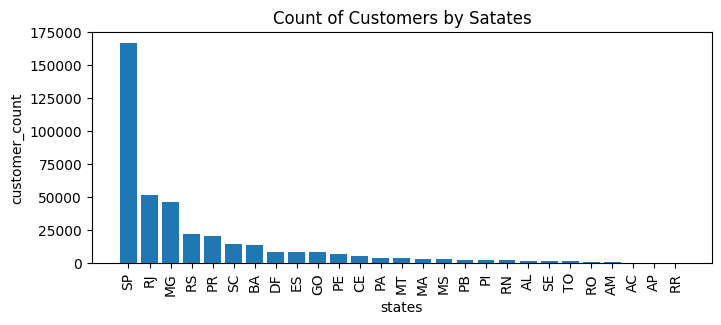

In [44]:
# count the number of customers from each states
import mysql.connector
import pandas as pd

conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Sahil@321",
    database="ecommerce"
)

cur = conn.cursor()

query = """ select customer_state ,count(customer_id)
from customers group by customer_state
"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns = ["state", "customer_count"])
df = df.sort_values(by = "customer_count", ascending= False)

plt.figure(figsize = (8,3))
plt.bar(df["state"], df["customer_count"])
plt.xticks(rotation = 90)
plt.xlabel("states")
plt.ylabel("customer_count")
plt.title("Count of Customers by Satates")
plt.show()

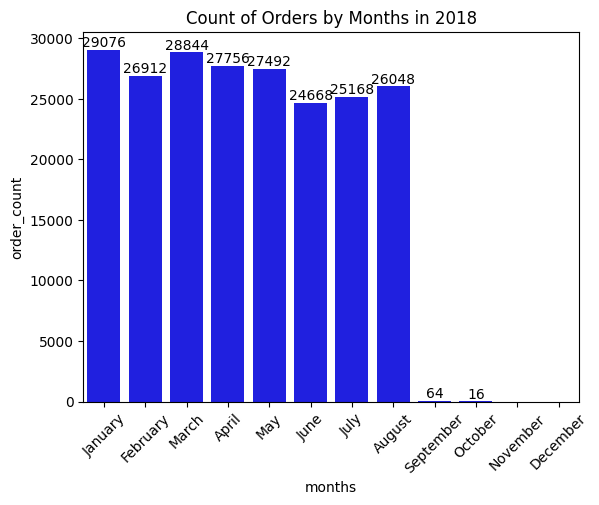

In [55]:
# calculate the number of orders per month in 2018
import mysql.connector
import pandas as pd

conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Sahil@321",
    database="ecommerce"
)

cur = conn.cursor()
query = """ select monthname(order_purchase_timestamp)months, count(order_id) order_count
from orders where year(order_purchase_timestamp) = 2018
group by months
"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns = ["months", "order_count"])
o = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

ax = sns.barplot(x = df["months"], y =  df["order_count"], data = df, order = o, color = "blue")
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0])
plt.title("Count of Orders by Months in 2018")
plt.show()

In [63]:
# find the average number of products per order, grouped by customer city.
import mysql.connector
import pandas as pd

conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Sahil@321",
    database="ecommerce"
)

cur = conn.cursor()



In [65]:
# find the average number of products per order, grouped by customer city.
query = """ WITH count_per_order AS (
    SELECT orders.customer_id, 
           COUNT(order_items.order_id) AS oc
    FROM ecommerce.orders
    JOIN ecommerce.order_items ON orders.order_id = order_items.order_id
    GROUP BY orders.customer_id
)

SELECT customers.customer_city, 
       AVG(count_per_order.oc) AS avg_orders_per_customer
FROM ecommerce.customers
JOIN count_per_order ON customers.customer_id = count_per_order.customer_id
GROUP BY customers.customer_city;
"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns=["Customer City", "Avg Products per Order"])
df.head(10)




,Customer City,Avg Products per Order
0,treze tilias,15.2727
1,indaial,13.3846
2,sao jose dos campos,13.6618
3,sao paulo,13.8746
4,porto alegre,14.0991
5,santos,13.9377
6,sao francisco do sul,14.8235
7,sao vicente,13.0909
8,joinville,13.2319
9,sao vendelino,12.0000


In [78]:
import mysql.connector
import pandas as pd

# Establish a connection to the MySQL database
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Sahil@321",
    database="ecommerce"  
)

# Create a cursor object
cur = conn.cursor()

# Define the SQL query to calculate percentage contribution by category
query = """
SELECT UPPER(p.product_category) AS category,
       ROUND((SUM(py.payment_value) / (SELECT SUM(payment_value) FROM ecommerce.payments)) * 100, 2) AS sales_percentage
FROM ecommerce.products p
JOIN ecommerce.order_items oi ON p.product_id = oi.product_id
JOIN ecommerce.payments py ON py.order_id = oi.order_id
GROUP BY p.product_category;
"""


cur.execute(query)


data = cur.fetchall()


df = pd.DataFrame(data, columns=["Category", "Percentage distribution"])
df.head()


print(df)


cur.close()
conn.close()





                       Category  Percentage distribution
0                     PERFUMERY                    37.98
1          FURNITURE DECORATION                   107.20
2                     TELEPHONY                    36.50
3                BED TABLE BATH                   128.37
4                    AUTOMOTIVE                    63.89
..                          ...                      ...
69               CDS MUSIC DVDS                     0.09
70                   LA CUISINE                     0.22
71  FASHION CHILDREN'S CLOTHING                     0.06
72                     PC GAMER                     0.16
73       INSURANCE AND SERVICES                     0.02

[74 rows x 2 columns]


In [115]:
# identify the correlation between product prize and the number of a product has been purchased
import mysql.connector
import pandas as pd
import numpy as np

conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Sahil@321",
    database="ecommerce" 
)
cur = conn.cursor()

query = """
SELECT products.product_category,
       COUNT(order_items.product_id) AS order_count,
       ROUND(AVG(order_items.price), 2) AS avg_price
FROM products 
JOIN order_items ON products.product_id = order_items.product_id
GROUP BY products.product_category;
"""

cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data, columns=["Category", "order_count", "Price"])
print(df.head())  # Display first few rows


arr1 = df["order_count"].astype(float)
arr2 = df["Price"].astype(float)


corr_matrix = np.corrcoef(arr1, arr2)


print("The correlation is", corr_matrix[0, 1])


               Category  order_count   Price
0         HEALTH BEAUTY       116040  130.16
1         sport leisure       103692  114.34
2            Cool Stuff        45552  167.36
3  computer accessories        93924  116.51
4       Watches present        71892  201.14
The correlation is -0.10631514167157559


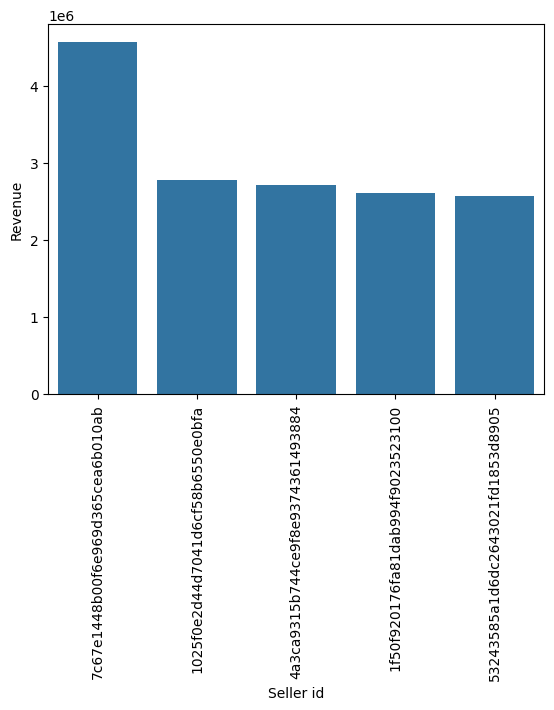

In [94]:
# calculate the total revenue generated by each seller, and rank them by revenue
query = """ SELECT *, dense_rank() over(order by revenue desc) as rn FROM
(SELECT order_items.seller_id,
SUM(payments.payment_value)
revenue from order_items 
JOIN payments
on order_items.order_id = payments.order_id
group by order_items.seller_id) as a"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Seller id", "Revenue", "Rank"])
df = df.head()
sns.barplot(x = "Seller id", y = "Revenue", data = df)
plt.xticks(rotation = 90)
plt.show()




In [95]:
# calculate the moving average of order values for each customer over their order history
query = """SELECT customer_id, order_purchase_timestamp, payment,
AVG(payment) over(partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row) as mov_avg
FROM
(SELECT orders.customer_id, orders.order_purchase_timestamp,
payments.payment_value as payment 
FROM payments 
JOIN orders
on payments.order_id = orders.order_id) as a"""


cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data)
df

,0,1,2,3
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
2,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
3,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
4,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
...,...,...,...,...
1246627,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
1246628,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
1246629,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
1246630,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001


In [98]:
# calculate the cumulative sales per month for each year
query = """SELECT years, months, payment,
SUM(payment)
OVER(order by years, months) cumulative_sales from 
(SELECT year(orders.order_purchase_timestamp) as years,
monthname(orders.order_purchase_timestamp) as months,
round(SUM(payments.payment_value),2) as payment
FROM orders 
JOIN payments
on orders.order_id = payments.order_id
GROUP BY years, months order by years, months) as a;
"""
cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data)
df



,0,1,2,3
0,2016,December,235.44,2.354400e+02
1,2016,October,709085.76,7.093212e+05
2,2016,September,3026.88,7.123481e+05
3,2017,April,5013456.35,5.725804e+06
4,2017,August,8092755.84,1.381856e+07
5,2017,December,10540817.76,2.435938e+07
6,2017,February,3502896.11,2.786227e+07
7,2017,January,1661856.48,2.952413e+07
8,2017,July,7108595.03,3.663273e+07
9,2017,June,6135316.56,4.276804e+07


In [113]:
# calculate the year over year growth rate of total sales
query = """
WITH yearly_sales AS (
    SELECT 
        YEAR(orders.order_purchase_timestamp) AS years,
        ROUND(SUM(payments.payment_value), 2) AS payment
    FROM orders 
    JOIN payments ON orders.order_id = payments.order_id
    GROUP BY years 
    ORDER BY years
)
SELECT 
    years, 
    payment AS sales, 
    LAG(payment, 1) OVER(ORDER BY years) AS previous_year,
    ROUND((payment - LAG(payment, 1) OVER(ORDER BY years)) / LAG(payment, 1) OVER(ORDER BY years) * 100, 2) AS yoy_growth
FROM yearly_sales;
"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=["years", "sales", "previous_year", "yoy_growth"])
df


,years,sales,previous_year,yoy_growth
0,2016,7.123481e+05,NaN,NaN
1,2017,8.699696e+07,712348.08,12112.7
2,2018,1.043972e+08,86996960.74,20.0


In [114]:
# calculate the retention rate of custromers,defined as the percentage of customers who make another purchase within 6 months of their first purchase.
query = """
WITH a AS (SELECT customers.customer_id,
min(orders.order_purchase_timestamp)first_order
FROM customers 
JOIN orders
on customers.customer_id = orders.customer_id
GROUP BY customers.customer_id),

b as (SELECT a.customer_id, count(distinct orders.order_purchase_timestamp) next_order
FROM a JOIN orders
on orders.customer_id = a.customer_id
AND orders.order_purchase_timestamp > first_order
AND orders.order_purchase_timestamp < 
date_add(first_order, interval 8 month) 
GROUP BY a.customer_id)

SELECT 100 * (COUNT(distinct a.customer_id)/ (COUNT(distinct b.customer_id)))
FROM a 
LEFT JOIN b
on a.customer_id = b.customer_id ;
"""

cur.execute(query)

data = cur.fetchall()
data

[(None,)]